In [9]:
#Load & Clean Data 
import pandas as pd

df = pd.read_csv(r"C:\Users\starr\OneDrive\Desktop\fraud_detection_project\data\creditcard.csv")
print(df.shape)
print(df['Class'].value_counts())  # Check fraud vs non-fraud

# Check missing values
print(df.isnull().sum())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


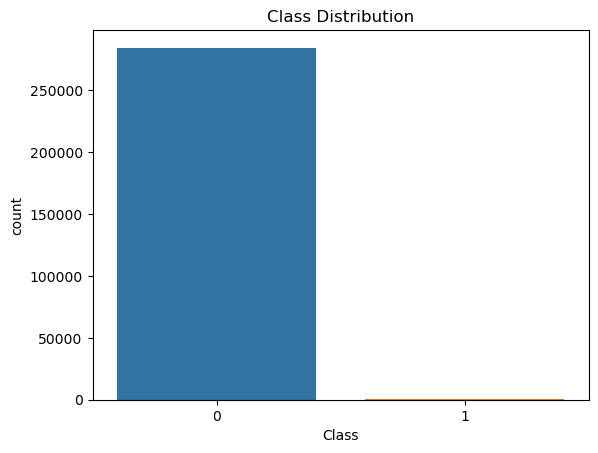

<Axes: >

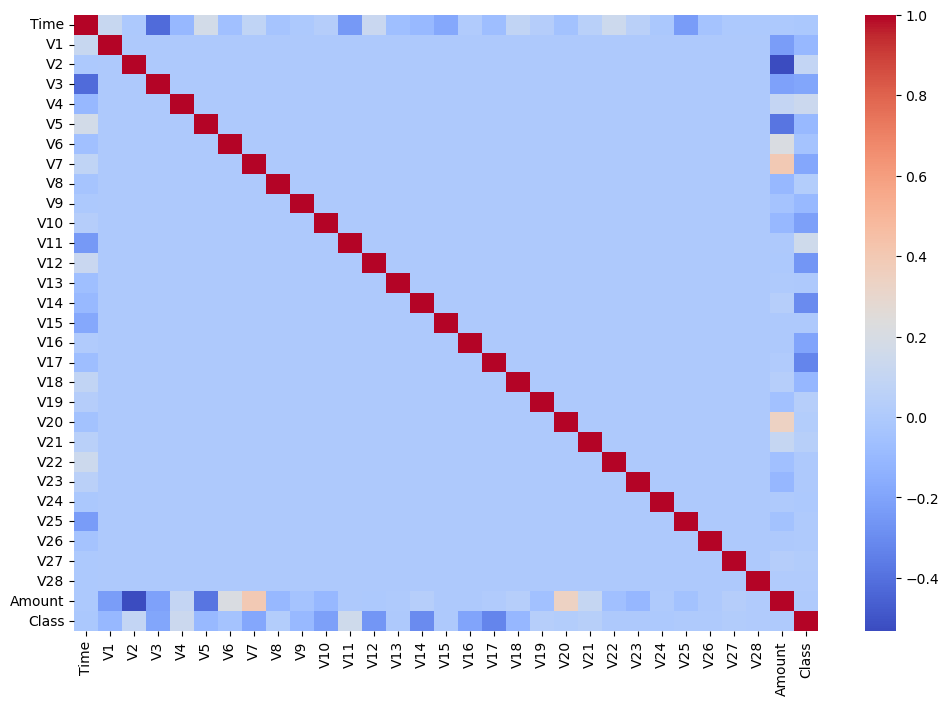

In [10]:
#EDA
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(data=df, x='Class')
plt.title('Class Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)

In [11]:
#Preprocessing & Train/Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
#Handle Class Imbalance (SMOTE)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

In [13]:
#Train Model (XGBoost)
from xgboost import XGBClassifier

model = XGBClassifier(eval_metric='logloss')
model.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [14]:
#Evaluate Model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))

[[56828    36]
 [   14    84]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.70      0.86      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9751345494585004


In [15]:
#Save Model
import joblib

joblib.dump(model, r"C:\Users\starr\OneDrive\Desktop\fraud_detection_project\model\model.pkl")
joblib.dump(scaler, r"C:\Users\starr\OneDrive\Desktop\fraud_detection_project\model\scaler.pkl")

['C:\\Users\\starr\\OneDrive\\Desktop\\fraud_detection_project\\model\\scaler.pkl']